## Import Kaggle Dataset from Kaggle

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


## 1. Data Loading and Initial Exploration



In [20]:
# to find the correct name of the file in kaggle
import os

for root, dirs, files in os.walk('/kaggle/input'):
    print(root)
    for file in files:
        print(file)


/kaggle/input
/kaggle/input/titanic-dataset
Titanic-Dataset.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

In [23]:
# Display the first few rows to understand the data structure
print("--- Initial Data View ---")
print(df.head())

# Summary of the data, including data types and non-null values
print("\n--- Dataset Information ---")
print(df.info())

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- Initial Data View ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

## 2. Exploratory Data Analysis (EDA)

EDA is crucial for understanding the relationships between different features and the target variable, which is Survived. This step helps in making informed decisions about feature engineering and model selection.

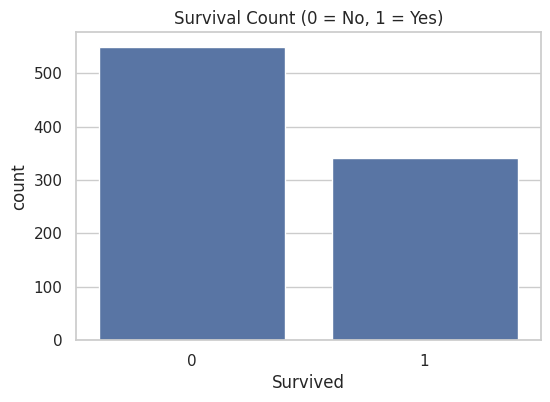

In [24]:
# Create a countplot for the 'Survived' column to see the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

In [25]:
# Explore survival rates by 'Sex'
print("\n--- Survival Rate by Gender ---")
print(df.groupby('Sex')['Survived'].mean().reset_index())


--- Survival Rate by Gender ---
      Sex  Survived
0  female  0.742038
1    male  0.188908


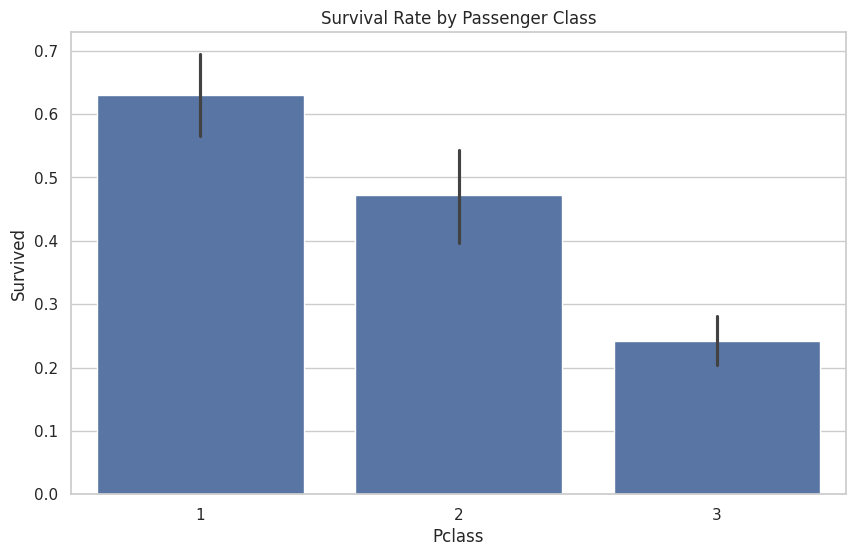

In [26]:
# Visualize survival rates by 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

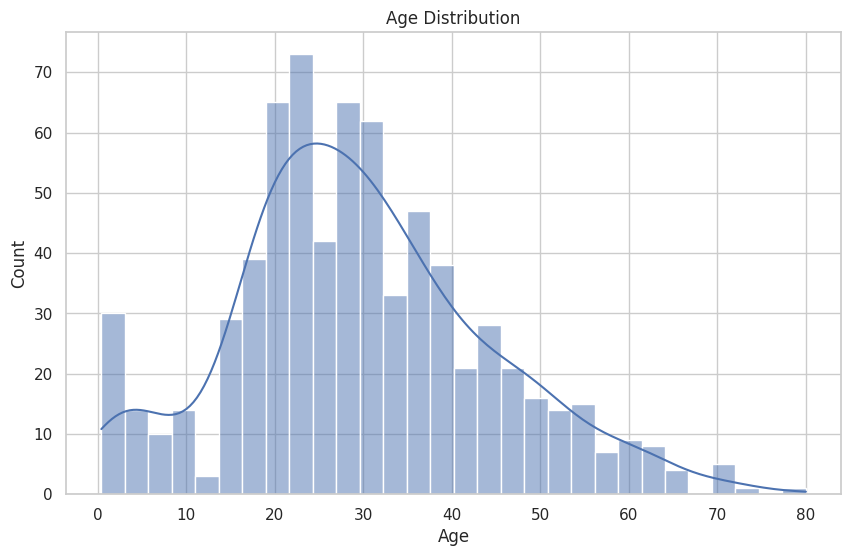

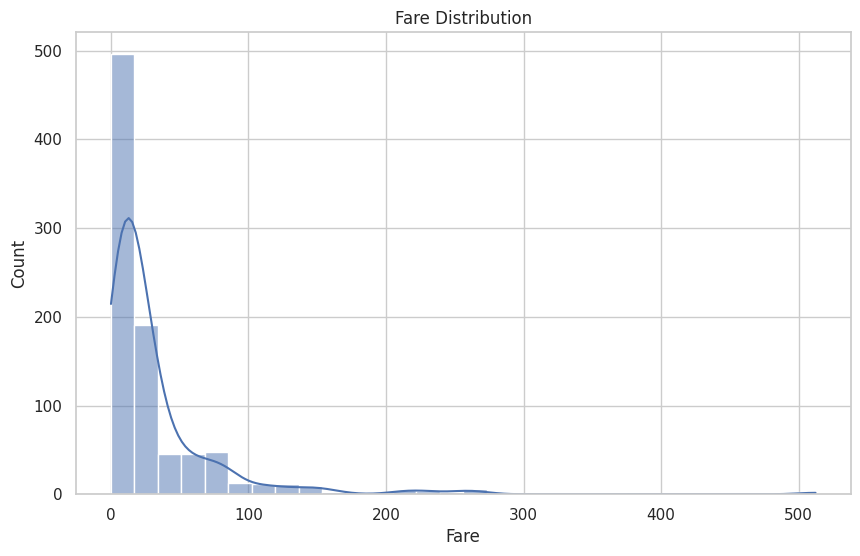

In [27]:
# Visualize the distribution of 'Age' and 'Fare'
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

## 3. Data Preprocessing and Feature Engineering

This is where you handle missing values, convert categorical data, and create new features that might be useful for your model

In [28]:
# Handling missing values
# Age: Fill missing ages with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked: Fill missing values with the most frequent port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin: This feature has too many missing values, so it's best to drop it
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-2950259849.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2950259849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [29]:
# Feature Engineering
# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone'
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [30]:
# Create 'Title' from the 'Name' column
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')

# Drop features that are no longer needed
df.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

# Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Final look at the processed data
print("\n--- Processed Data Info ---")
print(df.info())
print("\n--- Final Data View ---")
print(df.head())


--- Processed Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   Fare                891 non-null    float64
 5   FamilySize          891 non-null    int64  
 6   IsAlone             891 non-null    int64  
 7   Sex_male            891 non-null    bool   
 8   Embarked_Q          891 non-null    bool   
 9   Embarked_S          891 non-null    bool   
 10  Title_Miss          891 non-null    bool   
 11  Title_Mr            891 non-null    bool   
 12  Title_Mrs           891 non-null    bool   
 13  Title_Rare          891 non-null    bool   
 14  Title_the Countess  891 non-null    bool   
dtypes: bool(8), float64(2), int6

## 4. Model Training and Evaluation

Random Forest

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


--- Model Evaluation ---
Accuracy: 0.8547

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       105
           1       0.82      0.84      0.83        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179


--- Confusion Matrix ---


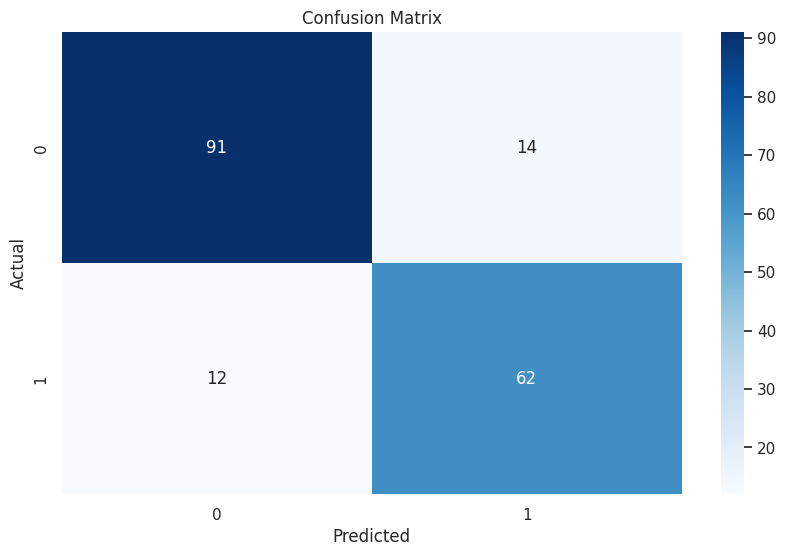

In [34]:
# Evaluate the model's performance
print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()